**Xarray:** Operates similar to Numpy but allows labelling of dimensions, and operations associated to this. Makes data easier to understand and work with, since can access data via labels rather than having to know the tensor structure. Used widely in geophysics and other areas.

In [1]:
import xarray as xr
import numpy as np

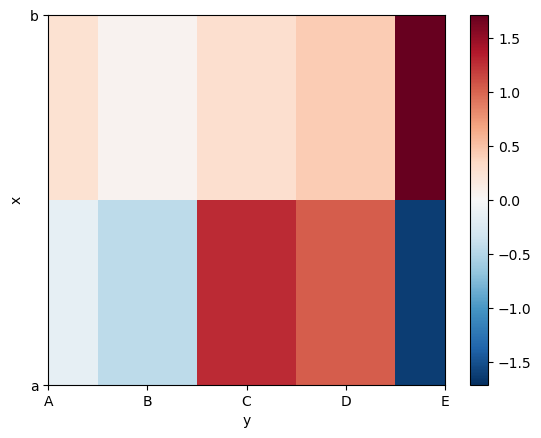

In [2]:
array = np.random.randn(2, 5) # 2 x 5 numbers generated from normal distribution
data = xr.DataArray(array, dims = ("x", "y"), coords = {"x": ['a','b'], "y": ['A','B','C','D','E']}) # format into xarray labelling dimensions with x,y.
data.plot()

In [48]:
data.values

array([[-0.37319693, -2.68637421,  1.04539803, -0.30387336, -1.07120831],
       [ 0.28134889, -2.02833797,  0.55117584, -0.50947116, -0.64488686]])

In [49]:
data.dims

('x', 'y')

In [50]:
data.coords

Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) <U1 'A' 'B' 'C' 'D' 'E'

In [51]:
data.x

<xarray.DataArray 'x' (x: 2)>
array(['a', 'b'], dtype='<U1')
Coordinates:
  * x        (x) <U1 'a' 'b'

Have assigned coordinate labels to x and y dimensions so can use label-based indexing. Or use normal indexing. 

In [52]:
# PANDAS STYLE
data.loc['a', 'A'] # # x = 0, y = 0 value

<xarray.DataArray ()>
array(-0.37319693)
Coordinates:
    x        <U1 'a'
    y        <U1 'A'

In [53]:
data.loc['b'] # x = 1 dimension

<xarray.DataArray (y: 5)>
array([ 0.28134889, -2.02833797,  0.55117584, -0.50947116, -0.64488686])
Coordinates:
    x        <U1 'b'
  * y        (y) <U1 'A' 'B' 'C' 'D' 'E'

In [54]:
# NUMPY STYLE
data[0, :] # x = 0 dimension with all y values

<xarray.DataArray (y: 5)>
array([-0.37319693, -2.68637421,  1.04539803, -0.30387336, -1.07120831])
Coordinates:
    x        <U1 'a'
  * y        (y) <U1 'A' 'B' 'C' 'D' 'E'

In [55]:
data.sel(x='a') # don't need to know how array is organised to access this

<xarray.DataArray (y: 5)>
array([-0.37319693, -2.68637421,  1.04539803, -0.30387336, -1.07120831])
Coordinates:
    x        <U1 'a'
  * y        (y) <U1 'A' 'B' 'C' 'D' 'E'

Assign metadata - useful for plotting

In [56]:
data.x.attrs["units"] = "metres"
data.y.attrs["units"] = "kelvin"
data.attrs["description"] = "x, y data"

Computation

In [57]:
np.sin(data+10), data.sum()

(<xarray.DataArray (x: 2, y: 5)>
 array([[-0.20065366,  0.85752567, -0.99875905, -0.26803101,  0.47589931],
        [-0.75560086,  0.99308365, -0.90286945, -0.06570351,  0.06960849]])
 Coordinates:
   * x        (x) <U1 'a' 'b'
   * y        (y) <U1 'A' 'B' 'C' 'D' 'E',
 <xarray.DataArray ()>
 array(-5.73942605))

In [58]:
data.mean(dim='x') # take mean along x-dimension i.e. this will gives 5-values corresponding to each coord

<xarray.DataArray (y: 5)>
array([-0.04592402, -2.35735609,  0.79828693, -0.40667226, -0.85804759])
Coordinates:
  * y        (y) <U1 'A' 'B' 'C' 'D' 'E'

Arithmetic operations broadcast based on dimension name - don't need to worry about dimension order because of labels

In [61]:
a = xr.DataArray(np.random.randn(5), [data.coords["y"]])
b = xr.DataArray(np.random.randn(3), dims = "z")
a+b

<xarray.DataArray (y: 5, z: 3)>
array([[-0.64396226,  0.52408386,  1.85207245],
       [-1.71858769, -0.55054156,  0.77744703],
       [-1.32464844, -0.15660231,  1.17138628],
       [-1.30733153, -0.1392854 ,  1.18870318],
       [-1.54404914, -0.37600301,  0.95198557]])
Coordinates:
  * y        (y) <U1 'A' 'B' 'C' 'D' 'E'
Dimensions without coordinates: z

netCDF

In [63]:
data.to_netcdf("xarray_example.nc")

In [65]:
restore = xr.open_dataset("xarray_example.nc")

Often store netCDF data in separate files by time: 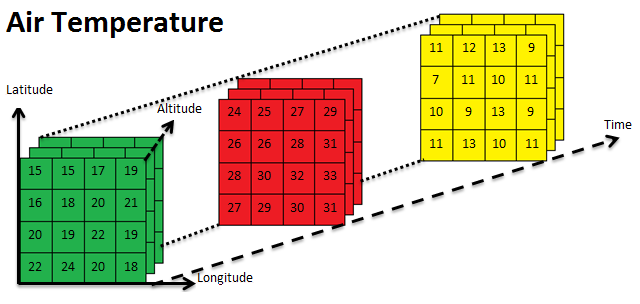

Xarray can be used to concatenate these timesteps into a single data array.

Example of creating a dataset to store temperature and wind data across two days:

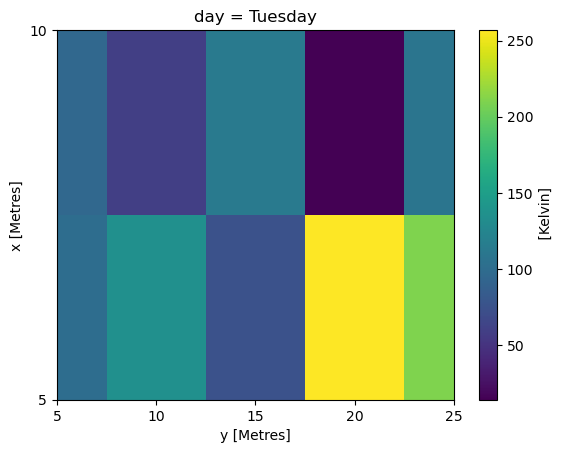

In [97]:
x_coords = ['5', '10']
y_coords = ['5', '10', '15', '20', '25']
# generate separate temperature data at x,y points for Monday, Tuesday
temp_monday = xr.DataArray(np.random.rand(2, 5)*273, dims = ("x", "y"), coords = {"x": x_coords, "y": y_coords})
temp_tuesday = xr.DataArray(np.random.rand(2, 5)*273, dims = ("x", "y"), coords = {"x": x_coords, "y": y_coords})
# concatenate data along new dimension, 'day'
temperature = xr.concat([temp_monday, temp_tuesday], dim = "day")
temperature = temperature.assign_coords(day = ["Monday", "Tuesday"]) # must assign coords separately
# assign unit metadata to x-axis, y-axis, and temperature data
temperature.attrs['units'] = 'Kelvin'
temperature.x.attrs['units'] = 'Metres' 
temperature.y.attrs['units'] = 'Metres'
temperature.sel(day="Tuesday").plot() # select and plot Tuesday data; we can access this without knowing the exact tensor structure of dataset, instead using labels.

In [ ]:
dataset.std(dim = "day").plot() # take std across days and plot

Now we will create another variable for wind speed, and compile temperature and wind speed data arrays into a single dataset.

In [102]:
x_coords = ['5', '10']
y_coords = ['5', '10', '15', '20', '25']
wind_monday = xr.DataArray(np.random.rand(2, 5)*10, dims = ("x", "y"), coords = {"x": x_coords, "y": y_coords})
wind_tuesday = xr.DataArray(np.random.rand(2, 5)*10, dims = ("x", "y"), coords = {"x": x_coords, "y": y_coords})
wind = xr.concat([wind_monday, wind_tuesday], dim = "day")
wind = wind.assign_coords(day = ["Monday", "Tuesday"])
wind.attrs['units'] = 'Metres/Second'
wind.x.attrs['units'] = 'Metres' 
wind.y.attrs['units'] = 'Metres'
dataset = xr.Dataset({
    "temperature": temperature,
    "wind": wind})
dataset

<xarray.Dataset>
Dimensions:      (x: 2, y: 5, day: 2)
Coordinates:
  * x            (x) <U2 '5' '10'
  * y            (y) <U2 '5' '10' '15' '20' '25'
  * day          (day) <U7 'Monday' 'Tuesday'
Data variables:
    temperature  (day, x, y) float64 119.1 248.8 238.1 ... 113.0 14.13 108.3
    wind         (day, x, y) float64 6.156 2.999 8.077 ... 9.534 7.429 0.4059

Now can access separate variables of the dataset. 

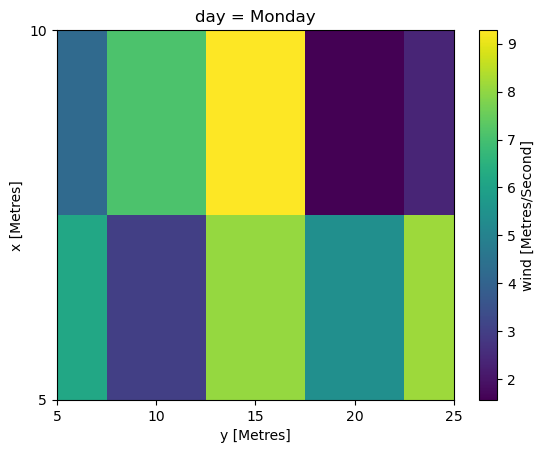

In [107]:
dataset.wind.sel(day="Monday").plot()

Normal operations such as coordinate assignment can be performed on datasets.

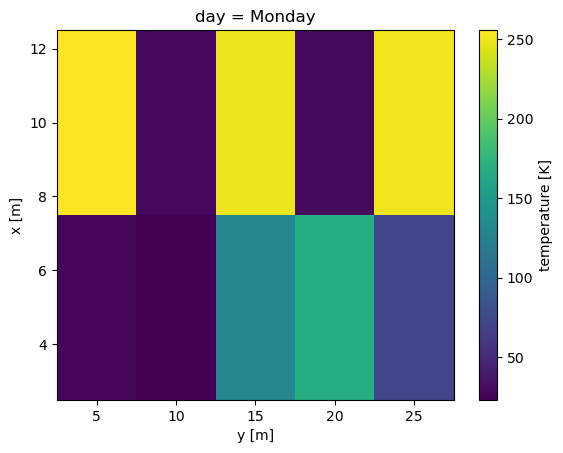

In [9]:
# create data arrays without coordinates
temp_monday = xr.DataArray(np.random.rand(2, 5)*273, dims = ("x", "y"))
temp_tuesday = xr.DataArray(np.random.rand(2, 5)*273, dims = ("x", "y"))
temperature = xr.concat([temp_monday, temp_tuesday], dim = "day")
temperature.attrs['units'] = "K"
wind_monday = xr.DataArray(np.random.rand(2, 5)*10, dims = ("x", "y"))
wind_tuesday = xr.DataArray(np.random.rand(2, 5)*10, dims = ("x", "y"))
wind = xr.concat([wind_monday, wind_tuesday], dim = "day")
wind.attrs['units'] = "m/s"
# create dataset
dataset = xr.Dataset({
    "temperature": temperature,
    "wind": wind})
# now assign coordinates to all variables in the dataset
x_coords = [5,10]
y_coords = [5,10,15,20,25]
days = ["Monday", "Tuesday"]
dataset=dataset.assign_coords(x = x_coords)
dataset=dataset.assign_coords(y = y_coords)
dataset=dataset.assign_coords(day = days)
dataset.x.attrs['units'] = 'm'
dataset.y.attrs['units'] = 'm'
dataset.temperature.sel(day='Monday').plot()